In [134]:
# current date, for retrieving data from proper location.
year = "2023"
month = "May"
day = "30"

## Imports and initialization

In [135]:
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
import scipy.constants as const
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [136]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

In [137]:
reloadMyModules(30)

In [138]:
atomlocs = [2, 2, 3, 3, 1]

In [139]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

## Sample Data

In [140]:
fileId = 22
threshold = 65

dataset1 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

Number of Pictures: 800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:6:2: on (Y-M-D) 2023-5-30, And ended at 14:9:40: on 2023-5-30
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



## Monte Carlo

In [141]:

def delta_x_par (T, omega_par, mass= 87*const.u):
    return np.sqrt(const.k*T / (mass * omega_par**2) )

def delta_x_perp (T, omega_perp, mass= 87*const.u):
    return np.sqrt(const.k*T / (mass * omega_perp**2) )

def delta_v (T, mass= 87*const.u):
    return np.sqrt(const.k * T/ mass)

def get_initial_params(T, omega_par, omega_perp, num):
    # in here we assume that the z direction is the tweezer axis -> omega parallel
    (xi, yi)= np.random.normal(0, delta_x_perp(T, omega_perp), 2)
    zi= np.random.normal(0, delta_x_par(T, omega_par))
    (vxi, vyi, vzi) = np.random.normal(0, delta_v(T), 3)
    return (xi, yi, zi, vxi, vyi, vzi)

def get_final_params(dt, xi,yi,zi, vxi, vyi, vzi):
    g= 9.8 # m/s
    xf = xi + vxi*dt
    yf = yi + vyi*dt - (g * dt**2)/2
    zf = zi + vzi*dt
    vxf = vxi
    vyf = vyi - g*dt
    vzf = vzi

    return (xf, yf, zf, vxf, vyf, vzf )

def get_final_K_energy (xf, yf, zf, vxf, vyf, vzf, omega_par, omega_perp, mass = 87*const.u):
    return mass/2 * (vxf**2 + vyf**2 + vzf**2) + 1/2 * mass * ( (omega_par**2 * zf**2) + omega_perp**2 * (xf**2+ yf**2))

def get_initial_params(T, omega_par, omega_perp, num=1):
    # in here we assume that the z direction is the tweezer axis -> omega parallel
    (xi, yi)= np.random.normal(0, delta_x_perp(T, omega_perp), 2*num).reshape(num,2).T
    zi= np.random.normal(0, delta_x_par(T, omega_par))
    (vxi, vyi, vzi) = np.random.normal(0, delta_v(T), 3*num).reshape(num,3).T
    return (xi, yi, zi, vxi, vyi, vzi)

def get_final_params(dt, xi,yi,zi, vxi, vyi, vzi):
    g= 9.8 # m/s
    xf = xi + vxi*dt
    yf = yi + vyi*dt - (g * dt**2)/2
    zf = zi + vzi*dt
    vxf = vxi
    vyf = vyi - g*dt
    vzf = vzi
    return (xf, yf, zf, vxf, vyf, vzf )

def get_final_K_energy (xf, yf, zf, vxf, vyf, vzf, omega_par, omega_perp, mass = 87*const.u):
    return mass/2 * (vxf**2 + vyf**2 + vzf**2) + 1/2 * mass * ( (omega_par**2 * zf**2) + omega_perp**2 * (xf**2+ yf**2))



def get_survival_release_capture(dts, T, initial_survival, tweezer_depth, verbose = False):
    
    '''
    :params T: temperature of atoms in the trap in S.I unit
    :params tweezer_depth: trap depth in the unit of K. The trap frequency is generated accordingly assuming NA = 0.5
    '''
    lambda_l= 850e-9 #m
    waist_twz = 700e-9 #m
    # waist_twz = 0.42*lambda_l/NA #m
    U0_tweezer_inK = tweezer_depth
    U0_tweezer_inJ = U0_tweezer_inK*const.k
    omega_radial = np.sqrt(4*U0_tweezer_inJ/(mc.Rb87_M*waist_twz**2)) # in rad/s
    omega_axial = omega_radial / (np.sqrt(2)*waist_twz*np.pi/lambda_l) # in rad/s
    if verbose==True:
        print("Trap depth in uK: ", abs(U0_tweezer_inK*1e6))
        print("Trap raidal freq (kHz): ", abs(omega_radial/ (2*np.pi)/1e3))
        print("Trap axial freq (kHz): ", abs(omega_axial/ (2*np.pi)/1e3))
        
    trajectories_per_time = 10000
    surv_dts = []
    for j in range(len(dts)):
        dt = dts[j]
        initial_params = get_initial_params(T, omega_par= omega_axial, omega_perp= omega_radial, num=trajectories_per_time)
        final_params = get_final_params(dt, *initial_params)
        final_K_energy = get_final_K_energy(*final_params, omega_par= omega_axial, omega_perp= omega_radial)
        surv = (final_K_energy<np.abs(U0_tweezer_inJ)).mean()
        surv_dts.append(surv)
    plt.plot(dts, np.array(surv_dts)*initial_survival)
    return np.array(surv_dts)*initial_survival

array([0.99    , 0.92565 , 0.578358, 0.338679, 0.188496, 0.11682 ,
       0.076923, 0.046926, 0.038412, 0.026136])

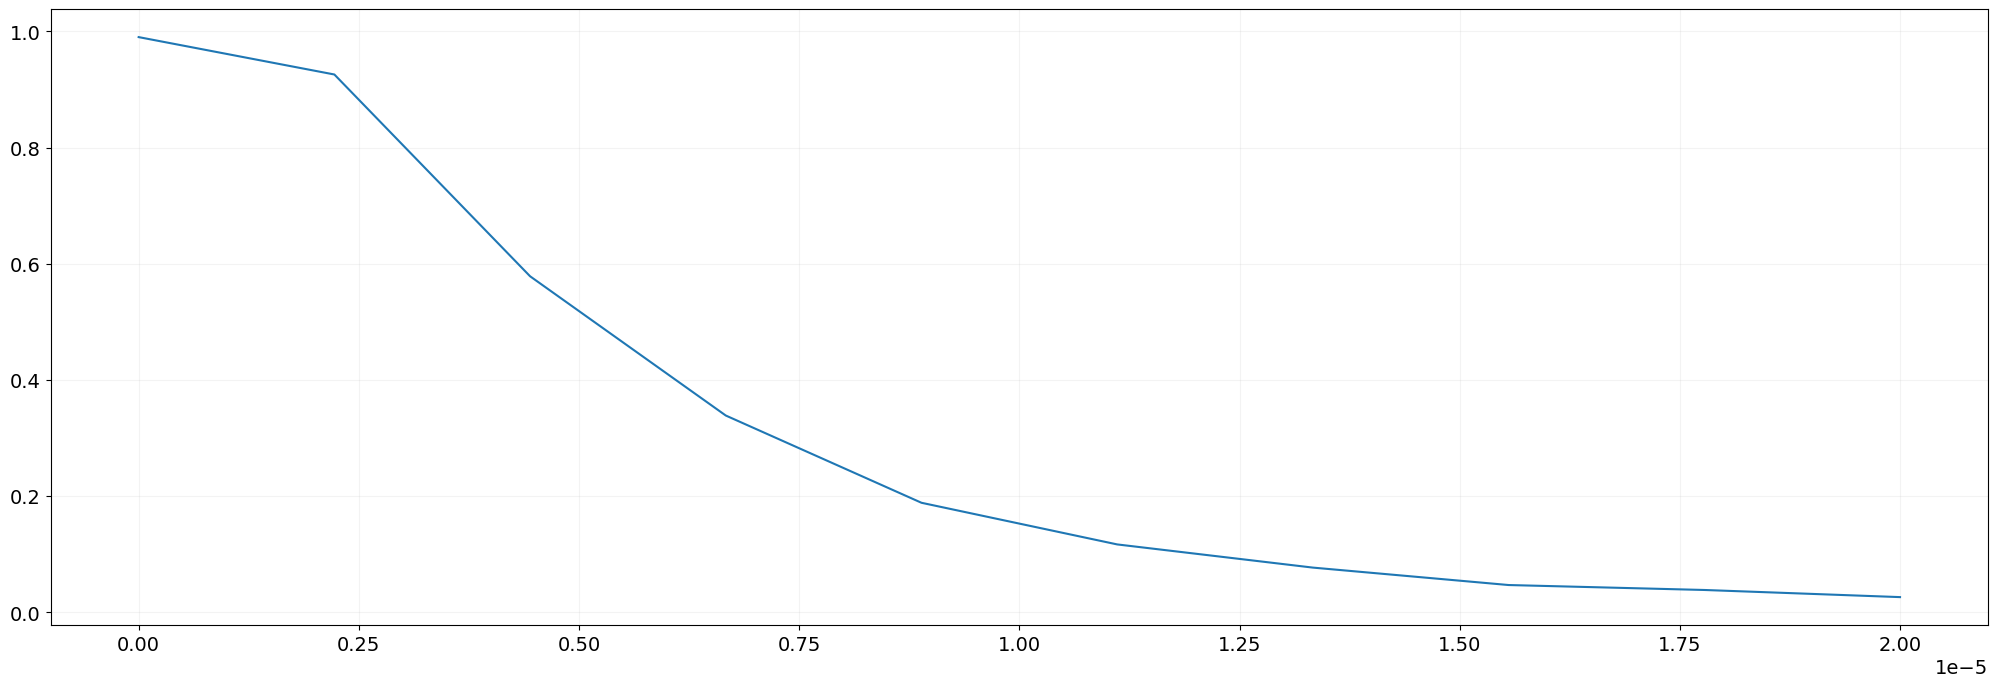

In [142]:
dts = np.linspace(0,20e-6,10)
T=60e-6
initial_survival=.99
tweezer_depth = 1e-3
get_survival_release_capture(dts, T, initial_survival, tweezer_depth, verbose = False)


## Fitting

In [143]:
from scipy.signal import savgol_filter
from scipy.optimize import fmin
from scipy.optimize import brentq
from scipy import optimize
from scipy.interpolate import interp1d

In [144]:
# Used for the fitting:
def residual(T, x_pts, data, uncertainties, initial_survival, tweezer_depth):
    model = get_survival_release_capture(x_pts, T, initial_survival=initial_survival, tweezer_depth=tweezer_depth)
    print(model,data,model-data)
    return (((model-data)/uncertainties)**2).sum()

In [145]:
def get_smoothed_residual_f(x, residual):
    _sg = savgol_filter(residual, window_length=51, polyorder=3) # window size 51, polynomial order 3
    _f = interp1d(x, _sg, kind='cubic')
    return _f

In [146]:
def get_minimum(_f, x0):
    _xmin,_fmin, _,_,warnflag = fmin(_f, 
        x0, disp=False,full_output=True)
    if warnflag:
        print(f"{warnflag:d} ---  1 : Maximum number of function evaluations made. 2 : Maximum number of iterations reached.")
    return _xmin, _fmin

In [147]:
def get_root(_f, y0, xbound0, xbound1):
    _f_offset = lambda x : (_f(x) - y0)
    root = brentq(_f_offset, xbound0, xbound1, disp=False)
    return root
    # return get_minimum(_f=_f_offset, x0=x0)

## Test fit

[0. 0. 0. 0. 0. 0. 0.] [1.         0.78571429 0.47058824 0.15789474 0.05882353 0.04545455
 0.        ] [-1.         -0.78571429 -0.47058824 -0.15789474 -0.05882353 -0.04545455
  0.        ]


1443.3904522939415

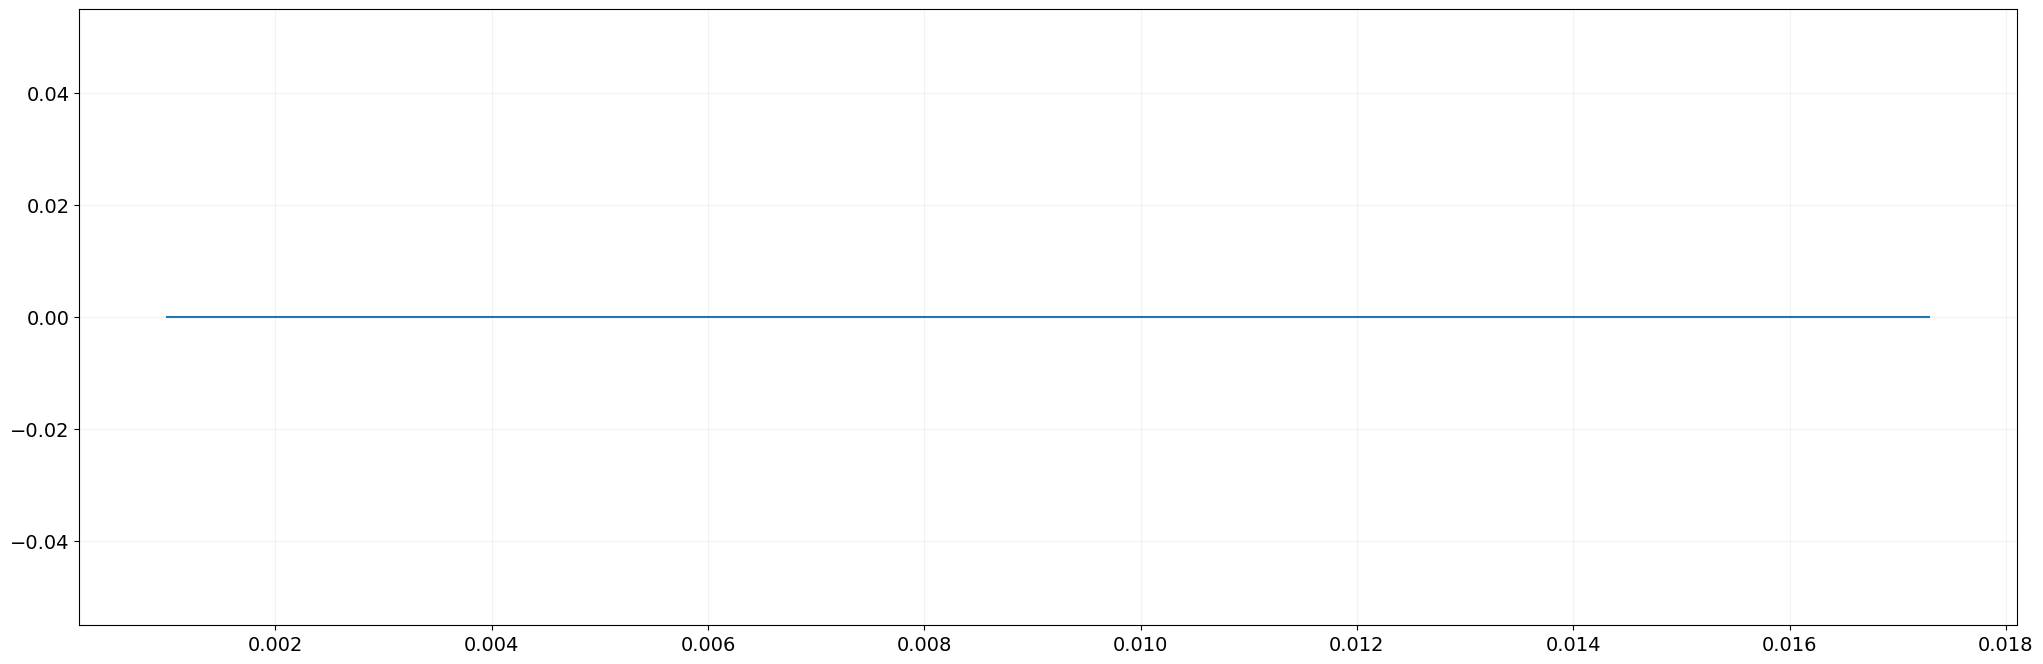

In [148]:

residual(60e-6,x_axis,surv,surv_unc,init_surv,trap_depth)

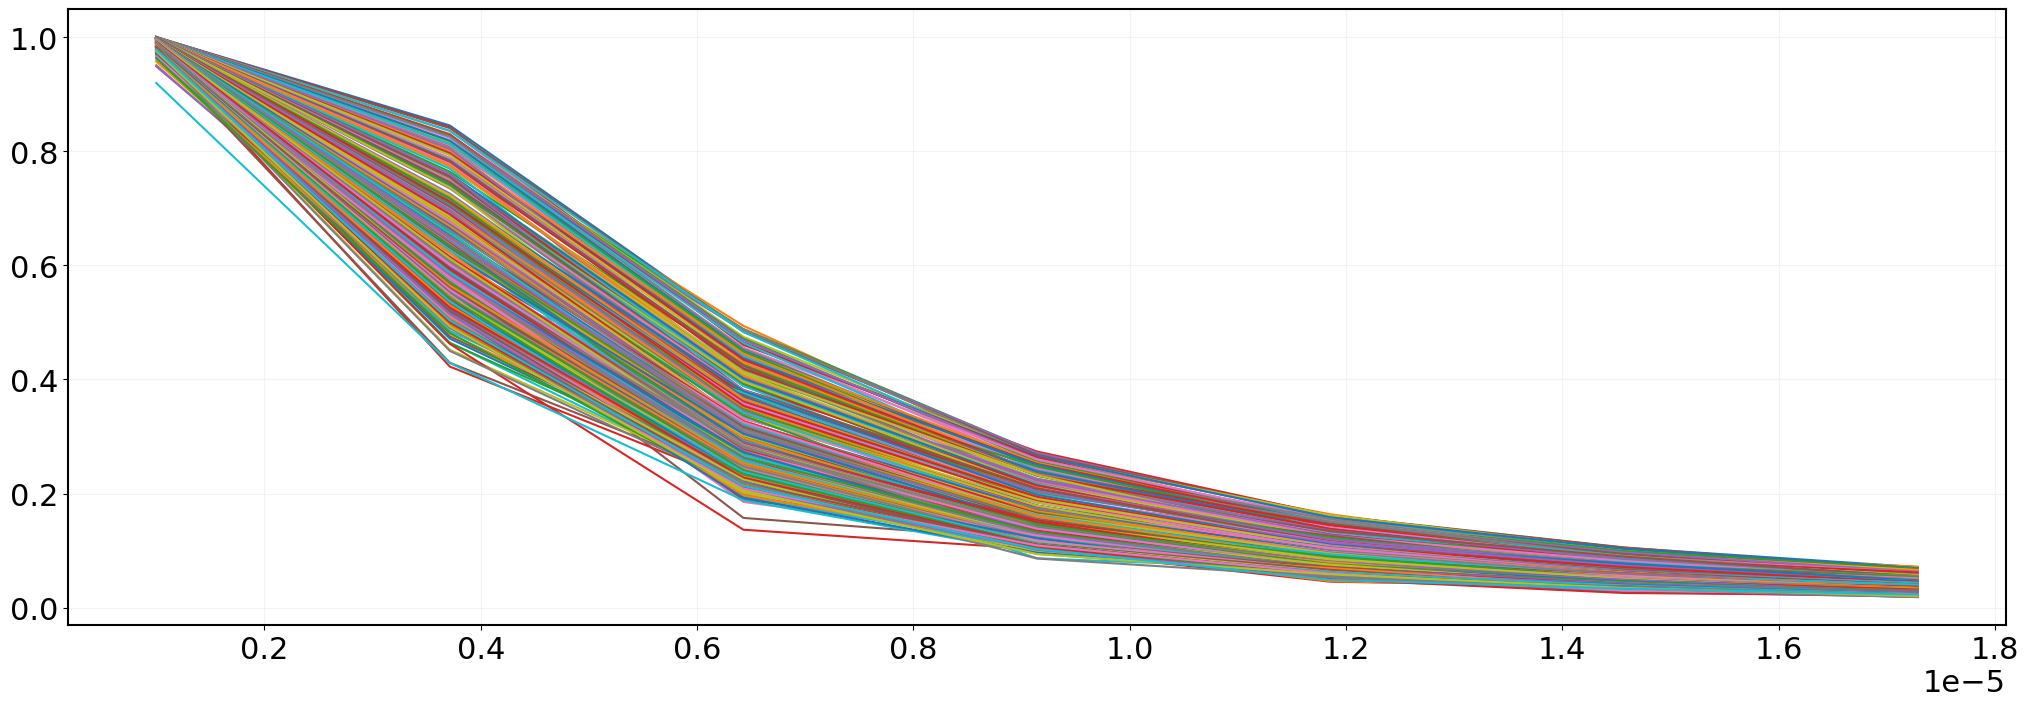

In [133]:
# Used for the fitting:
def residual(T, x_pts, data, uncertainties, initial_survival, tweezer_depth):
    model = get_survival_release_capture(x_pts, T, initial_survival=initial_survival, tweezer_depth=tweezer_depth)
    return (((model-data)/uncertainties)**2).sum()
surv = avgTferData1[0:7]
surv_unc = [np.mean([up,lo]) for (up,lo) in zip(err1[0][0:7],err1[1][0:7])]
x_axis = key1[0:7]
init_surv = avgTferData1[0]
trap_depth = 1e-3
rranges = (slice(40e-6, 100e-6, 0.2e-6),)
out, fout, grid, fgrid = optimize.brute(residual,rranges, 
    args=(x_axis*1e-3, surv, surv_unc, init_surv, trap_depth), full_output=True, finish='leastsq')

Text(0.5, 1.0, 'release-capture survival')

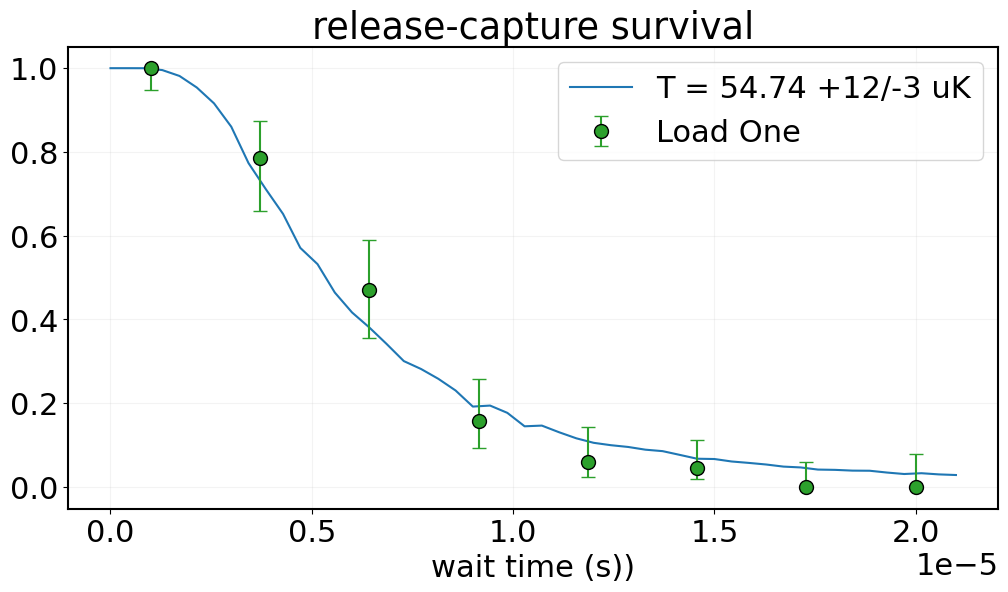

In [121]:
surv = avgTferData1[0:7]
surv_unc = [np.mean([up,lo]) for (up,lo) in zip(err1[0][0:7],err1[1][0:7])]
x_axis = key1[0:7] 
init_surv = avgTferData1[0]
trap_depth = 1e-3
rranges = (slice(40e-6, 100e-6, 0.2e-6),)
out, fout, grid, fgrid = optimize.brute(residual,rranges, 
    args=(x_axis*1e-3, surv, surv_unc, init_surv, trap_depth), full_output=True, finish='leastsq')
f_loss_smooth = get_smoothed_residual_f(grid, fgrid)
grid_min, loss_min = get_minimum(f_loss_smooth, out)
grid_min_err_low = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid.min(), xbound1=grid_min)
grid_min_err_high = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid_min, xbound1=grid.max())
low_err=grid_min[0]-grid_min_err_low # those turns out to be array with only one element
high_err=grid_min_err_high-grid_min[0]
popt_min=grid_min[0]
loss_mins=loss_min
# print(grid_min, grid_min_err_low, grid_min_err_high, loss_min)
fig,ax = plt.subplots(1, figsize=[12,6])
ax = [ax]

times= np.linspace(0, 21e-6, 50)
ax[0].plot(times, get_survival_release_capture(times, 
        popt_min, initial_survival=init_surv, tweezer_depth=trap_depth), 
        label= f"T = {popt_min*1e6:.2f} +{high_err*1e6:.0f}/-{low_err*1e6:.0f} uK")
ax[0].errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='Load One')
ax[0].legend()
ax[0].set_xlabel(r"wait time (s))")
ax[0].set_title("release-capture survival")

## make function for Analysis Helpers

In [124]:
def releaseRecaptureTemp(xData,survivalData,errorBars,tempGuess=60e-6,trapDepth=1e-3,rrange=(30e-6,100e-6,0.2e-6)):
    surv = survivalData
    surv_unc = [np.mean([up,lo]) for (up,lo) in zip(errorBars[0][0:len(surv)],errorBars[1][0:len(surv)])]
    x_axis = xData[0:len(surv)]
    init_surv = surv[0]
    trap_depth = trapDepth
    rranges = (slice(rrange[0], rrange[1], 0.2e-6),)
    out, fout, grid, fgrid = optimize.brute(residual,rranges, 
        args=(x_axis*1e-3, surv, surv_unc, init_surv, trap_depth), full_output=True, finish='leastsq')
    f_loss_smooth = get_smoothed_residual_f(grid, fgrid)
    grid_min, loss_min = get_minimum(f_loss_smooth, out)
    grid_min_err_low = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid.min(), xbound1=grid_min)
    grid_min_err_high = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid_min, xbound1=grid.max())
    low_err=grid_min[0]-grid_min_err_low # those turns out to be array with only one element
    high_err=grid_min_err_high-grid_min[0]
    popt_min=grid_min[0]
    loss_mins=loss_min
    # print(grid_min, grid_min_err_low, grid_min_err_high, loss_min)
    times= np.linspace(0, xData[-1]*1e-3, 50)
    plt.plot(times, get_survival_release_capture(times, 
            popt_min, initial_survival=init_surv, tweezer_depth=trap_depth), 
            label= f"T = {popt_min*1e6:.2f} +{high_err*1e6:.0f}/-{low_err*1e6:.0f} uK")

Number of Pictures: 800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:6:2: on (Y-M-D) 2023-5-30, And ended at 14:9:40: on 2023-5-30
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

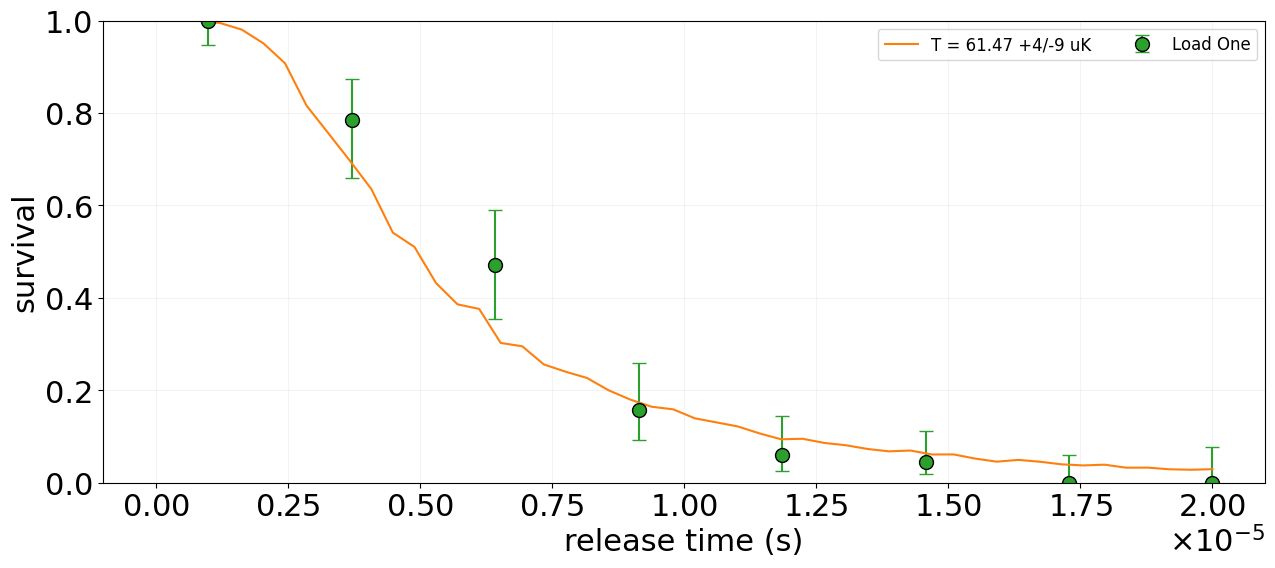

In [149]:
fileId = 22
threshold = 65

dataset1 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
 
plt.figure(dpi=1200)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
ticks = np.arange(0,max(key1),100)

temp_guess = 58e-6
trap_depth = 1e-3
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='Load One')
ah.releaseRecaptureTemp(key1,avgTferData1[0:7],err1,tempGuess=temp_guess,trapDepth=trap_depth)
ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", scilimits=(0, 0), axis="x")

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 8:38:48: on (Y-M-D) 2023-11-22, And ended at 8:48:41: on 2023-11-22
Experiment Notes:  



<Figure size 30000x9600 with 0 Axes>

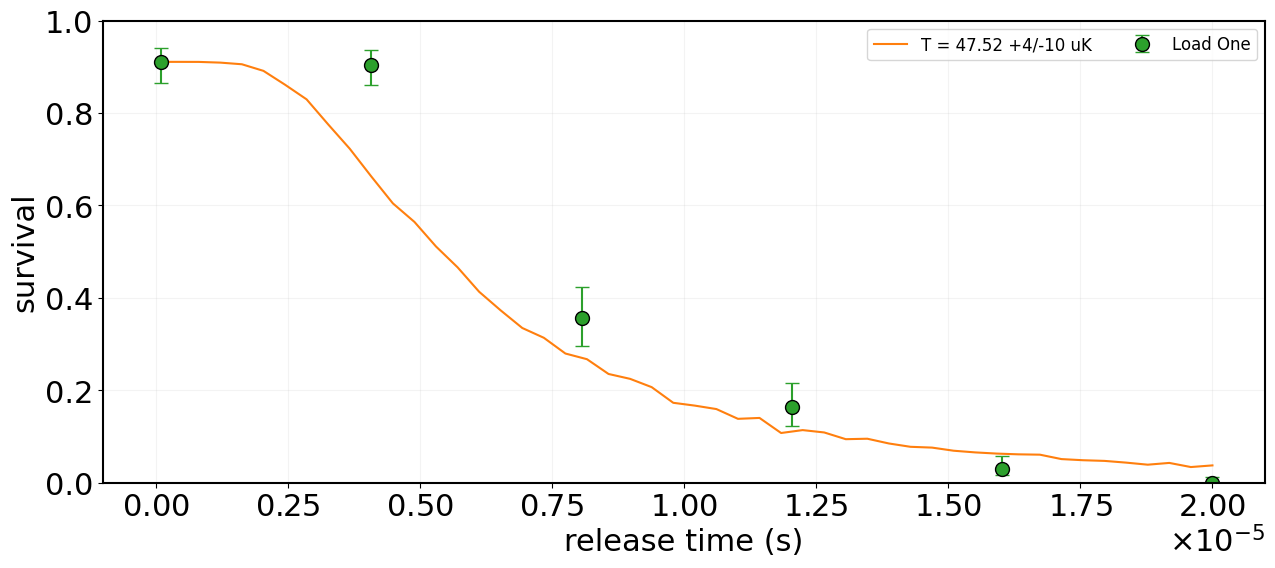

In [151]:
reloadMyModules(22,'November')
fileId = 2
threshold = 60

dataset1 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
 
plt.figure(dpi=1200)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
ticks = np.arange(0,max(key1),100)

temp_guess = 58e-6
trap_depth = 1e-3
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='Load One')
ah.releaseRecaptureTemp(key1,avgTferData1[0:7],err1,tempGuess=temp_guess,trapDepth=trap_depth)
ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", scilimits=(0, 0), axis="x")